* `Pull the Dataset from Kaggle` [Here](https://www.kaggle.com/c/dogs-vs-cats/data)


In [1]:
!pip install -q kagglehub

In [2]:
from google.colab import files
import os

# Step 1: Upload kaggle.json manually
print("📂 Please upload your kaggle.json file:")
uploaded = files.upload()

# Ensure the uploaded file exists
if "kaggle.json" not in uploaded:
    print("❌ kaggle.json upload failed. Please try again.")
else:
    # Step 2: Move the file to the correct location
    !mkdir -p /root/.kaggle
    !mv kaggle.json /root/.kaggle/

    # Step 3: Set proper permissions (read and write)
    !chmod 600 /root/.kaggle/kaggle.json

    # Step 4: Verify that the file exists
    if os.path.exists("/root/.kaggle/kaggle.json"):
        print("✅ kaggle.json uploaded and set up correctly!")
    else:
        print("❌ kaggle.json upload failed. Please check the file path.")

    # Step 5: Download the Dogs vs. Cats dataset
    print("📥 Downloading the Dogs vs. Cats dataset...")
    #!/bin/bash
    !kaggle datasets download salader/dogs-vs-cats

    # Step 6: Create a target directory for extraction
    dataset_path = "/content/dogs-vs-cats"
    !mkdir -p {dataset_path}

    # Step 7: Unzip the downloaded dataset
    print("📂 Extracting dataset...")
    !unzip -q dogs-vs-cats.zip -d {dataset_path}

    # Step 8: Verify dataset extraction
    extracted_files = os.listdir(dataset_path)
    print(f"✅ Dataset downloaded and extracted to: {dataset_path}")
    print("📂 Contents of the dataset:", extracted_files)

📂 Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
✅ kaggle.json uploaded and set up correctly!
📥 Downloading the Dogs vs. Cats dataset...
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:16<00:00, 153MB/s]
100% 1.06G/1.06G [00:16<00:00, 69.4MB/s]
📂 Extracting dataset...
✅ Dataset downloaded and extracted to: /content/dogs-vs-cats
📂 Contents of the dataset: ['test', 'dogs_vs_cats', 'train']


In [ ]:
# Remove the source .zip
if os.path.exists('./dogs-vs-cats.zip'):
    os.remove('./dogs-vs-cats.zip')

In [ ]:
# Unzip the training dataset
!unzip -q "/content/dogs-vs-cats/train.zip" -d "/content/dataset"

unzip:  cannot find or open /content/dogs-vs-cats/train.zip, /content/dogs-vs-cats/train.zip.zip or /content/dogs-vs-cats/train.zip.ZIP.


In [ ]:
import shutil

In [ ]:
# Remove the source
if os.path.exists('/content/dogs-vs-cats'):
    shutil.rmtree('/content/dogs-vs-cats')

In [ ]:
# Original Dir that contains the full dataset
ORIGINAL_DIR = os.path.join(os.getcwd(), 'dataset', 'train')

# Create base directory and subsets
BASE_DIR = os.path.join(os.getcwd(), 'subset_dataset')
os.makedirs(BASE_DIR, exist_ok=True)

# Main directories for each fold of dataset
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'test')

# Create Folders inside each fold of dataset (one for cats and other for dogs)

# Training
TRAIN_CATS_DIR = os.path.join(BASE_DIR, 'train', 'cats')
TRAIN_DOGS_DIR = os.path.join(BASE_DIR, 'train', 'dogs')
os.makedirs(TRAIN_CATS_DIR, exist_ok=True)
os.makedirs(TRAIN_DOGS_DIR, exist_ok=True)

# Validation
VALID_CATS_DIR = os.path.join(BASE_DIR, 'valid', 'cats')
VALID_DOGS_DIR = os.path.join(BASE_DIR, 'valid', 'dogs')
os.makedirs(VALID_CATS_DIR, exist_ok=True)
os.makedirs(VALID_DOGS_DIR, exist_ok=True)

# Testing
TEST_CATS_DIR = os.path.join(BASE_DIR, 'test', 'cats')
TEST_DOGS_DIR = os.path.join(BASE_DIR, 'test', 'dogs')
os.makedirs(TEST_CATS_DIR, exist_ok=True)
os.makedirs(TEST_DOGS_DIR, exist_ok=True)

In [ ]:
# ---- Train ---- #
# Copy first 1000 cat images to train
imgs_train = ['cats/cat.{}.jpg'.format(i) for i in range(500)]
for img in imgs_train:
    src = os.path.join(ORIGINAL_DIR, img)
    dst = os.path.join(TRAIN_CATS_DIR, img)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train
imgs_train = ['dog.{}.jpg'.format(i) for i in range(500)]
for img in imgs_train:
    src = os.path.join(ORIGINAL_DIR, img)
    dst = os.path.join(TRAIN_DOGS_DIR, img)
    shutil.copyfile(src, dst)

# ---- Valid ---- #
# Copy second 500 cat images to valid
imgs_valid = ['cat.{}.jpg'.format(i) for i in range(500, 750)]
for img in imgs_valid:
    src = os.path.join(ORIGINAL_DIR, img)
    dst = os.path.join(VALID_CATS_DIR, img)
    shutil.copyfile(src, dst)

# Copy second 500 dog images to valid
imgs_valid = ['dog.{}.jpg'.format(i) for i in range(500, 750)]
for img in imgs_valid:
    src = os.path.join(ORIGINAL_DIR, img)
    dst = os.path.join(VALID_DOGS_DIR, img)
    shutil.copyfile(src, dst)


# ---- Test ---- #
# Copy second 500 cat images to test
imgs_test = ['cat.{}.jpg'.format(i) for i in range(750, 1000)]
for img in imgs_test:
    src = os.path.join(ORIGINAL_DIR, img)
    dst = os.path.join(TEST_CATS_DIR, img)
    shutil.copyfile(src, dst)

# Copy second 500 dog images to test
imgs_test = ['dog.{}.jpg'.format(i) for i in range(750, 1000)]
for img in imgs_test:
    src = os.path.join(ORIGINAL_DIR, img)
    dst = os.path.join(TEST_DOGS_DIR, img)
    shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: '/content/subset_dataset/train/cats/cats/cat.0.jpg'

In [3]:

import os
import shutil
import random
from pathlib import Path

def combine_and_split_dataset(
    original_train_path,
    original_test_path,
    output_path,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    seed=42
):
    """
    Combine dogs-vs-cats dataset and split into train/val/test

    Args:
        original_train_path: Path to original train folder (contains cats/ and dogs/)
        original_test_path: Path to original test folder (contains cats/ and dogs/)
        output_path: Path where new dataset structure will be created
        train_ratio: Proportion for training set (default: 0.7)
        val_ratio: Proportion for validation set (default: 0.15)
        test_ratio: Proportion for test set (default: 0.15)
        seed: Random seed for reproducibility
    """

    # Set random seed for reproducibility
    random.seed(seed)

    # Validate ratios
    if abs(train_ratio + val_ratio + test_ratio - 1.0) > 1e-6:
        raise ValueError("Ratios must sum to 1.0")

    # Create output directory structure
    output_path = Path(output_path)
    for split in ['train', 'val', 'test']:
        for class_name in ['cats', 'dogs']:
            (output_path / split / class_name).mkdir(parents=True, exist_ok=True)

    # Process each class (cats and dogs)
    for class_name in ['cats', 'dogs']:
        print(f"Processing {class_name}...")

        # Collect all images from both original train and test folders
        all_images = []

        # From original train folder
        train_class_path = Path(original_train_path) / class_name
        if train_class_path.exists():
            all_images.extend(list(train_class_path.glob('*')))

        # From original test folder
        test_class_path = Path(original_test_path) / class_name
        if test_class_path.exists():
            all_images.extend(list(test_class_path.glob('*')))

        # Filter only image files
        image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
        all_images = [img for img in all_images if img.suffix.lower() in image_extensions]

        print(f"Found {len(all_images)} {class_name} images")

        # Shuffle the images
        random.shuffle(all_images)

        # Calculate split indices
        n_total = len(all_images)
        n_train = int(n_total * train_ratio)
        n_val = int(n_total * val_ratio)

        # Split the images
        train_images = all_images[:n_train]
        val_images = all_images[n_train:n_train + n_val]
        test_images = all_images[n_train + n_val:]

        print(f"{class_name} split: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test")

        # Copy images to respective folders
        for split_name, images in [('train', train_images), ('val', val_images), ('test', test_images)]:
            dest_folder = output_path / split_name / class_name

            for i, img_path in enumerate(images):
                # Create new filename to avoid conflicts
                new_name = f"{class_name}_{split_name}_{i:04d}{img_path.suffix}"
                dest_path = dest_folder / new_name

                # Copy the image
                shutil.copy2(img_path, dest_path)

    print(f"\nDataset successfully created at: {output_path}")
    print("\nFinal structure:")
    for split in ['train', 'val', 'test']:
        for class_name in ['cats', 'dogs']:
            count = len(list((output_path / split / class_name).glob('*')))
            print(f"  {split}/{class_name}: {count} images")

In [5]:
  # Update these paths according to your dataset location
original_train_path = "/content/dogs-vs-cats/train"  # Contains cats/ and dogs/ folders
original_test_path = "/content/dogs-vs-cats/test"    # Contains cats/ and dogs/ folders
output_path = "/content/dataset"             # Where the new dataset will be created

combine_and_split_dataset(
        original_train_path=original_train_path,
        original_test_path=original_test_path,
        output_path=output_path,
        train_ratio=0.7,   # 70% for training
        val_ratio=0.15,    # 15% for validation
        test_ratio=0.15    # 15% for testing
    )

Processing cats...
Found 12500 cats images
cats split: 8750 train, 1875 val, 1875 test
Processing dogs...
Found 12500 dogs images
dogs split: 8750 train, 1875 val, 1875 test

Dataset successfully created at: /content/dataset

Final structure:
  train/cats: 8750 images
  train/dogs: 8750 images
  val/cats: 1875 images
  val/dogs: 1875 images
  test/cats: 1875 images
  test/dogs: 1875 images


In [ ]:
# Create base directory and subsets
BASE_DIR = os.path.join(os.getcwd(), 'subset_dataset')
os.makedirs(BASE_DIR, exist_ok=True)

# Main directories for each fold of dataset
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'test')

In [7]:
TRAIN_CATS_DIR="/content/dataset/train/cats"
TRAIN_DOGS_DIR="/content/dataset/train/dogs"
TEST_CATS_DIR="/content/dataset/test/cats"
TEST_DOGS_DIR="/content/dataset/test/dogs"
VALID_CATS_DIR="/content/dataset/val/cats"
VALID_DOGS_DIR="/content/dataset/val/dogs"


In [8]:
# Check
print('Total training cat images:', len(os.listdir(TRAIN_CATS_DIR)))
print('Total training dog images:', len(os.listdir(TRAIN_DOGS_DIR)))
print()
print('Total validation cat images:', len(os.listdir(VALID_CATS_DIR)))
print('Total validation dog images:', len(os.listdir(VALID_DOGS_DIR)))
print()
print('Total test cat images:', len(os.listdir(TEST_CATS_DIR)))
print('Total test dog images:', len(os.listdir(TEST_DOGS_DIR)))

Total training cat images: 8750
Total training dog images: 8750

Total validation cat images: 1875
Total validation dog images: 1875

Total test cat images: 1875
Total test dog images: 1875


In [ ]:
# Remove the source
if os.path.exists('/content/dataset'):
    shutil.rmtree('/content/dataset')

-----

* `Import Libraries`

In [9]:
import numpy as np
import glob
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

* `Explore Dataset`

array([[[ 75,  72,  81],
        [ 61,  60,  66],
        [ 55,  55,  55],
        ...,
        [ 65,  61,  60],
        [ 63,  59,  58],
        [ 63,  59,  58]],

       [[ 66,  63,  72],
        [ 57,  56,  61],
        [ 57,  57,  57],
        ...,
        [ 68,  64,  63],
        [ 65,  61,  60],
        [ 65,  61,  60]],

       [[ 51,  48,  55],
        [ 48,  48,  50],
        [ 55,  55,  53],
        ...,
        [ 66,  65,  61],
        [ 64,  63,  59],
        [ 63,  62,  58]],

       ...,

       [[255, 255, 250],
        [250, 250, 248],
        [243, 246, 255],
        ...,
        [ 18,  20,  17],
        [ 19,  21,  18],
        [ 20,  22,  19]],

       [[255, 255, 248],
        [251, 251, 249],
        [247, 250, 255],
        ...,
        [ 18,  20,  17],
        [ 19,  21,  18],
        [ 20,  22,  19]],

       [[255, 255, 246],
        [253, 254, 249],
        [251, 254, 255],
        ...,
        [ 18,  20,  17],
        [ 19,  21,  18],
        [ 20,  22,  19]]], dtype=uint8)
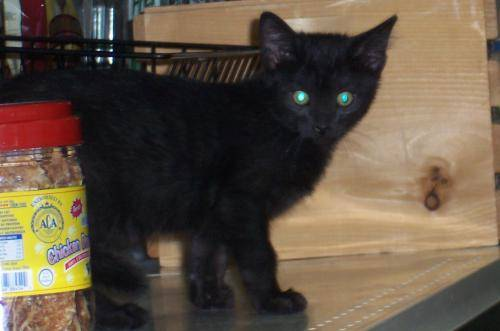

In [14]:
plt.imread(os.path.join(TRAIN_CATS_DIR, 'cats_train_0016.jpg'))

In [21]:
# Create base directory and subsets
BASE_DIR = os.path.join(os.getcwd(), 'dataset')
os.makedirs(BASE_DIR, exist_ok=True)

# Main directories for each fold of dataset
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'val')
TEST_DIR = os.path.join(BASE_DIR, 'test')
# ... rest of the directory creation

In [19]:
# Check sizes for Training Dataset
sizes = []
for folder in os.listdir(TRAIN_DIR):
    images = glob.glob(pathname=str(TRAIN_DIR + '/' + folder + '/*.jpg'))
    for img in images:
        image = plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts().head()

,count
"(374, 500, 3)",2057
"(375, 499, 3)",2016
"(499, 375, 3)",185
"(333, 499, 3)",161
"(500, 374, 3)",160


In [22]:
# Check sizes for Validation Dataset
sizes = []
for folder in os.listdir(VALID_DIR):
    images = glob.glob(pathname=str(VALID_DIR + '/' + folder + '/*.jpg'))
    for img in images:
        image = plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts().head()

,count
"(374, 500, 3)",435
"(375, 499, 3)",428
"(500, 374, 3)",36
"(240, 319, 3)",36
"(239, 320, 3)",34


In [23]:
# Check sizes for Testing Dataset
sizes = []
for folder in os.listdir(TEST_DIR):
    images = glob.glob(pathname=str(TEST_DIR + '/' + folder + '/*.jpg'))
    for img in images:
        image = plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts().head()

,count
"(375, 499, 3)",468
"(374, 500, 3)",463
"(499, 375, 3)",45
"(333, 499, 3)",36
"(332, 500, 3)",32


* `I will work (150x150x3)`

### `Feature Extraction using Pre-trained Model`

In [24]:
# Load for exmaple (EfficientNetB0) as the feature extractor
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)
# Freeze it
base_model.trainable = False


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [25]:
# Training Generator with Data Augmentation | (EfficientNetB0) --> Has its own rescaling
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=30,  # We can do some Data Augmentation also
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and Test Generator (No Augmentation) --> Has its own rescaling
other_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


# Apply these generators
train_gen = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
  )

valid_gen = other_datagen.flow_from_directory(
    directory=VALID_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

test_gen = other_datagen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

Found 17500 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


In [26]:
# Create a new model
model = tf.keras.Sequential([
    base_model,  # Feature Extractor
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 5, 5, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fitting
history = model.fit(train_gen,
                    validation_data=(test_gen),
                    steps_per_epoch=len(train_gen),
                    validation_steps=len(test_gen),
                    epochs=10,   # need more epochs
                    callbacks=[early_stopp])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 166s 261ms/step - accuracy: 0.8736 - loss: 0.2955 - val_accuracy: 0.9819 - val_loss: 0.0622
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 125s 228ms/step - accuracy: 0.9611 - loss: 0.1083 - val_accuracy: 0.9813 - val_loss: 0.0512
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 123s 225ms/step - accuracy: 0.9622 - loss: 0.0925 - val_accuracy: 0.9819 - val_loss: 0.0479
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 121s 222ms/step - accuracy: 0.9666 - loss: 0.0883 - val_accuracy: 0.9813 - val_loss: 0.0456
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 122s 222ms/step - accuracy: 0.9699 - loss: 0.0795 - val_accuracy: 0.9821 - val_loss: 0.0451
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 148s 233ms/step - accuracy: 0.9701 - loss: 0.0819 - val_accuracy: 0.9821 - val_loss: 0.0434
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 118s 216ms/step - accuracy: 0.9714 - loss: 0.0758 - val_accuracy: 0.9821 - val_loss: 0.0429
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 120s 219ms/step - accuracy: 0.9677 -

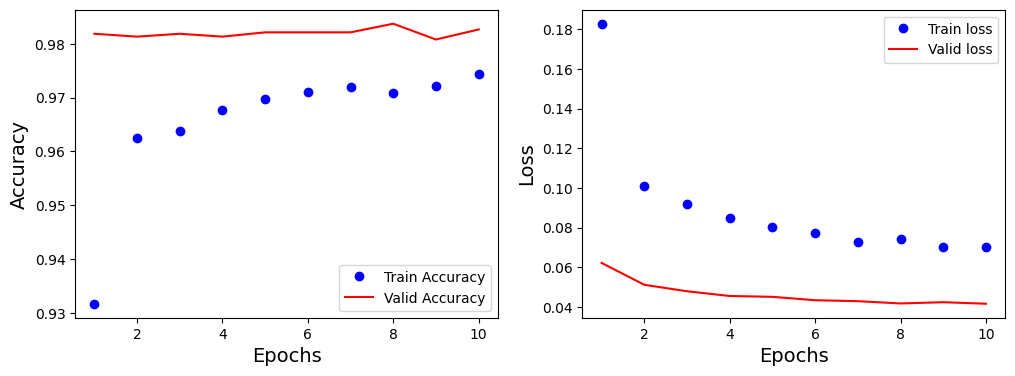

In [28]:
# Visualize the resutls
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

In [29]:
# Evaluate on test_set
loss_test, acc_test = model.evaluate(test_gen, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)

loss_test => 0.041672710329294205
acc_test => 0.9826666712760925


----

### `Fine-Tuning a Pre-Trained Model`

In [30]:
# Load for exmaple (EfficientNetB0) as the feature extractor
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)
# Freeze it
base_model.trainable = False

In [31]:
# Training Generator with Data Augmentation | (EfficientNetB0) --> Has its own rescaling
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=30,  # We can do some Data Augmentation also
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and Test Generator (No Augmentation) --> Has its own rescaling
other_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


# Apply these generators
train_gen = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
  )

valid_gen = other_datagen.flow_from_directory(
    directory=VALID_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

test_gen = other_datagen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

Found 17500 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


In [32]:
# Create a new model
model = tf.keras.Sequential([
    base_model,  # Feature Extractor
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 5, 5, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fitting
history = model.fit(train_gen,
                    validation_data=(valid_gen),
                    steps_per_epoch=len(train_gen),
                    validation_steps=len(valid_gen),
                    epochs=5,   # just with no fine-tuning (a gentle start)
                    callbacks=[early_stopp])

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 159s 254ms/step - accuracy: 0.8776 - loss: 0.2958 - val_accuracy: 0.9795 - val_loss: 0.0689
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 174s 219ms/step - accuracy: 0.9600 - loss: 0.1076 - val_accuracy: 0.9824 - val_loss: 0.0550
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 122s 222ms/step - accuracy: 0.9674 - loss: 0.0878 - val_accuracy: 0.9827 - val_loss: 0.0501
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 140s 220ms/step - accuracy: 0.9665 - loss: 0.0887 - val_accuracy: 0.9832 - val_loss: 0.0472
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 124s 226ms/step - accuracy: 0.9696 - loss: 0.0830 - val_accuracy: 0.9837 - val_loss: 0.0449


In [34]:
# Unfreeze Some Layers for Fine-Tuning
base_model.trainable = True

# Optionally, freeze only the first few layers
for layer in base_model.layers[:200]:
    layer.trainable = False  # Keep early layers frozen


# Reduce LR for fine-tuning --> so, compile again
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,  # Fine-tune for more epochs
    steps_per_epoch=len(train_gen),
    validation_steps=len(valid_gen),
    callbacks=[early_stopp]
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 174s 261ms/step - accuracy: 0.9281 - loss: 0.1817 - val_accuracy: 0.9776 - val_loss: 0.0596
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 122s 222ms/step - accuracy: 0.9516 - loss: 0.1229 - val_accuracy: 0.9792 - val_loss: 0.0519
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 120s 220ms/step - accuracy: 0.9611 - loss: 0.1052 - val_accuracy: 0.9797 - val_loss: 0.0479
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 121s 220ms/step - accuracy: 0.9620 - loss: 0.1055 - val_accuracy: 0.9816 - val_loss: 0.0466
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 118s 217ms/step - accuracy: 0.9629 - loss: 0.0955 - val_accuracy: 0.9819 - val_loss: 0.0446
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 121s 221ms/step - accuracy: 0.9682 - loss: 0.0905 - val_accuracy: 0.9832 - val_loss: 0.0423
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 120s 220ms/step - accuracy: 0.9630 - loss: 0.0899 - val_accuracy: 0.9829 - val_loss: 0.0416
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 122s 222ms/step - accuracy: 0.9651 -

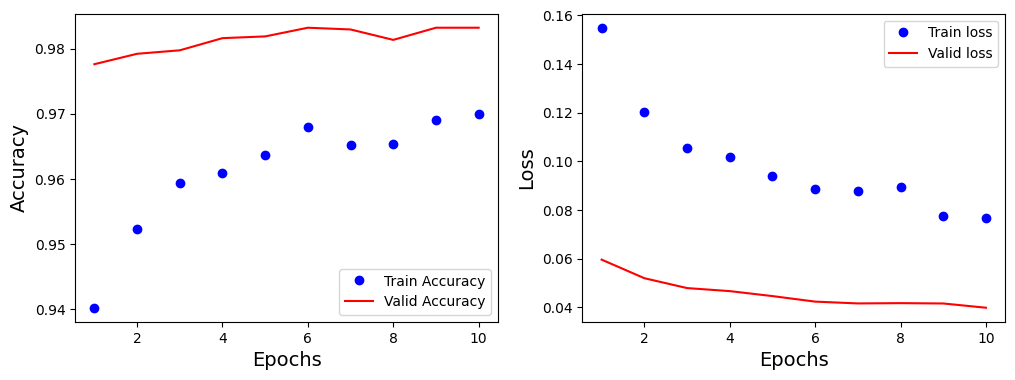

In [35]:
# Visualize the resutls
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

In [36]:
# Evaluate on test_set
loss_test, acc_test = model.evaluate(test_gen, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)

loss_test => 0.03836819902062416
acc_test => 0.986133337020874


In [37]:
ASSETS_FOLDER_PATH = os.path.join(os.getcwd(), "assets")
os.makedirs(ASSETS_FOLDER_PATH, exist_ok=True)

In [38]:
# dump model
model.save(os.path.join(ASSETS_FOLDER_PATH, "model.keras"))

# Idx2Label and dump it
idx2label = {v: k for k, v in train_gen.class_indices.items()}
joblib.dump(idx2label, os.path.join(ASSETS_FOLDER_PATH, "idx2label.joblib"))

['/content/assets/idx2label.joblib']

In [39]:
idx2label

{0: 'cats', 1: 'dogs'}

-----

In [40]:
# Taking some samples
data, target = next(test_gen)
sampels = data[:10]

def preprocess_image(image: np.ndarray) -> np.ndarray:
    # Check if the image is a single sample
    if image.ndim == 3:
        image = np.expand_dims(image, axis=0)  # To (1, height, width, channels)

    # Process for the chosen model (EfficientNet)
    image_array = tf.keras.applications.efficientnet.preprocess_input(image)
    return image_array

# Call the function
preprocessed_images = preprocess_image(sampels)
# Prediction
y_pred_prob = model.predict(preprocessed_images)
y_pred_class = (y_pred_prob > 0.5).astype(int)
predicted_class_names = [idx2label[class_id] for class_id in y_pred_class.flatten()]
predicted_class_names

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats']

-----